In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import warnings
# Bỏ qua tất cả các cảnh báo
warnings.filterwarnings("ignore")

In [95]:
df = pd.read_csv("Data/full_data_processed.csv")
df.dtypes

Date             object
Price           float64
Open            float64
High            float64
Low             float64
Vol.            float64
Change %        float64
Stock symbol     object
Bank             object
dtype: object

## 1/ Trung bình bao lâu thì giá cổ phiếu các ngân hàng đạt giá trị trung bình? nói lên điều gì?

9237.194630872484 2018 VPB
7428.750400000001 2019 VPB
8751.644444444444 2020 VPB
21419.6872 2021 VPB
19149.046184738956 2022 VPB
18206.671485943774 2023 VPB
18240.951578947366 2024 VPB


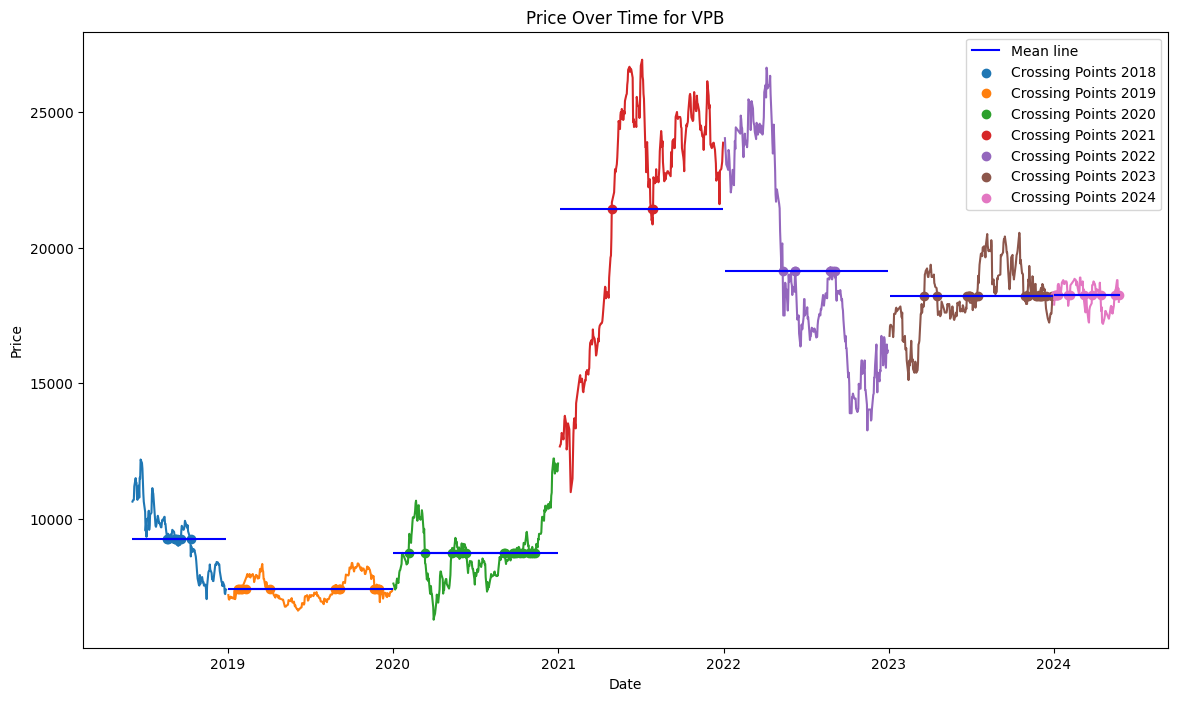

44344.03355704698 2018 VCB
56569.556 2019 VCB
63991.24206349206 2020 VCB
77223.908 2021 VCB
69869.16465863455 2022 VCB
82821.52610441767 2023 VCB
92021.05263157895 2024 VCB


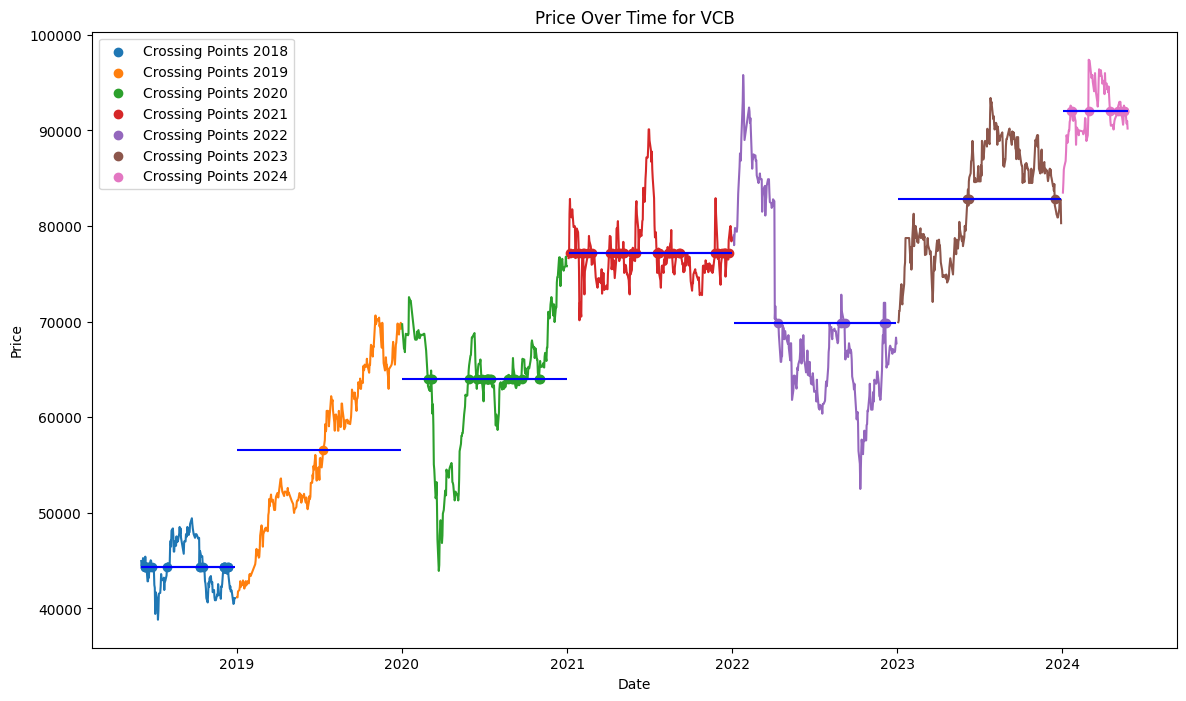

23701.761744966443 2018 BID
27834.4988 2019 BID
32341.073412698413 2020 BID
34031.39719999999 2021 BID
35193.642570281125 2022 BID
39726.208835341364 2023 BID
49954.73684210526 2024 BID


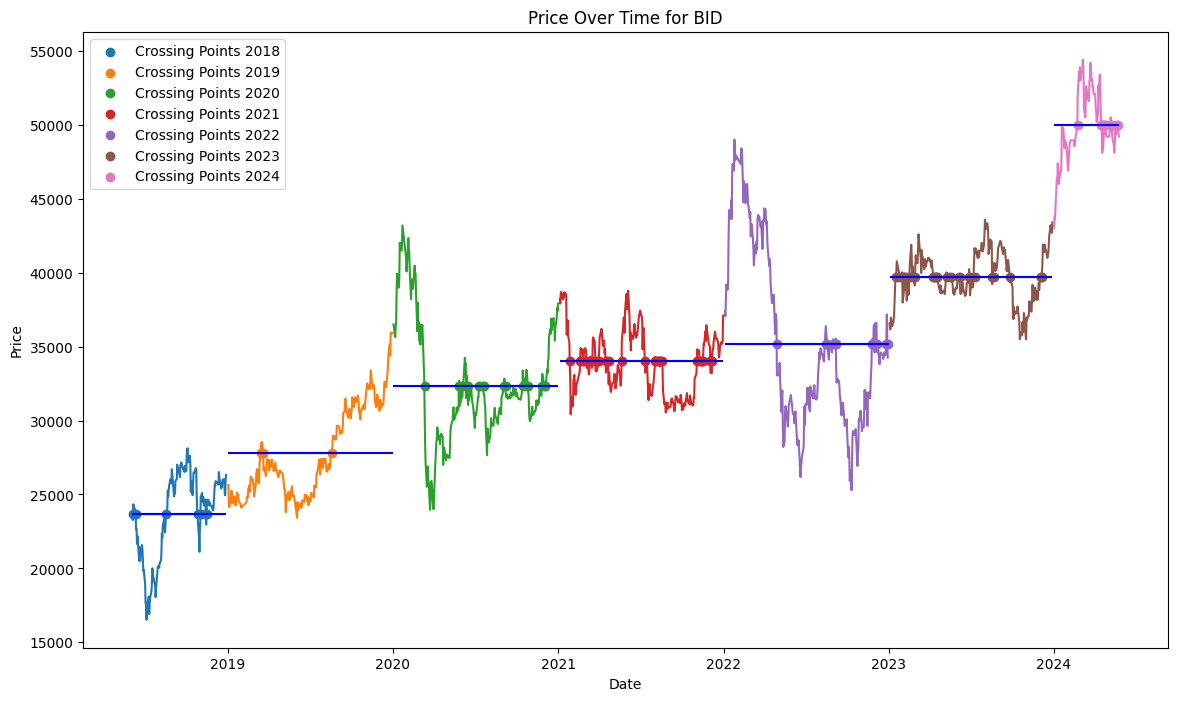

3476.7865771812076 2018 AGR
3892.5651999999995 2019 AGR
4042.3059523809525 2020 AGR
15003.7668 2021 AGR
12757.738152610442 2022 AGR
12757.777510040161 2023 AGR
18763.684210526317 2024 AGR


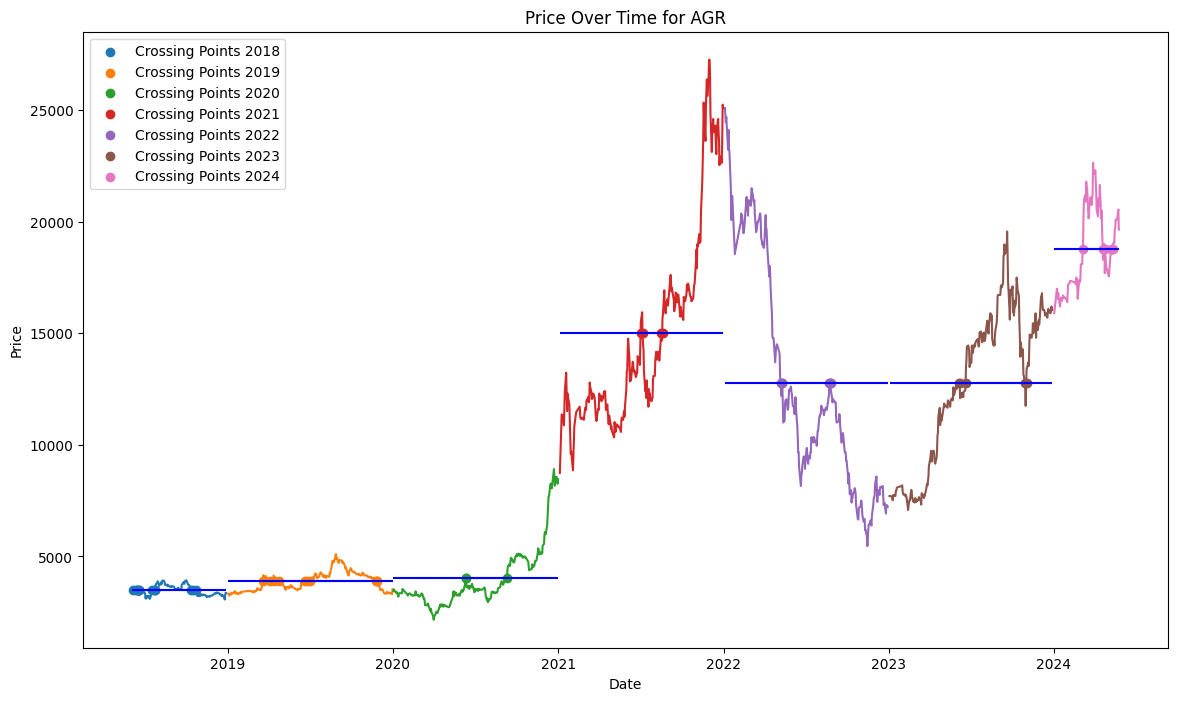

18236.47718120805 2018 CTG
15566.468 2019 CTG
19009.12579365079 2020 CTG
32110.559599999997 2021 CTG
26156.027710843377 2022 CTG
26443.259839357426 2023 CTG
33354.73684210526 2024 CTG


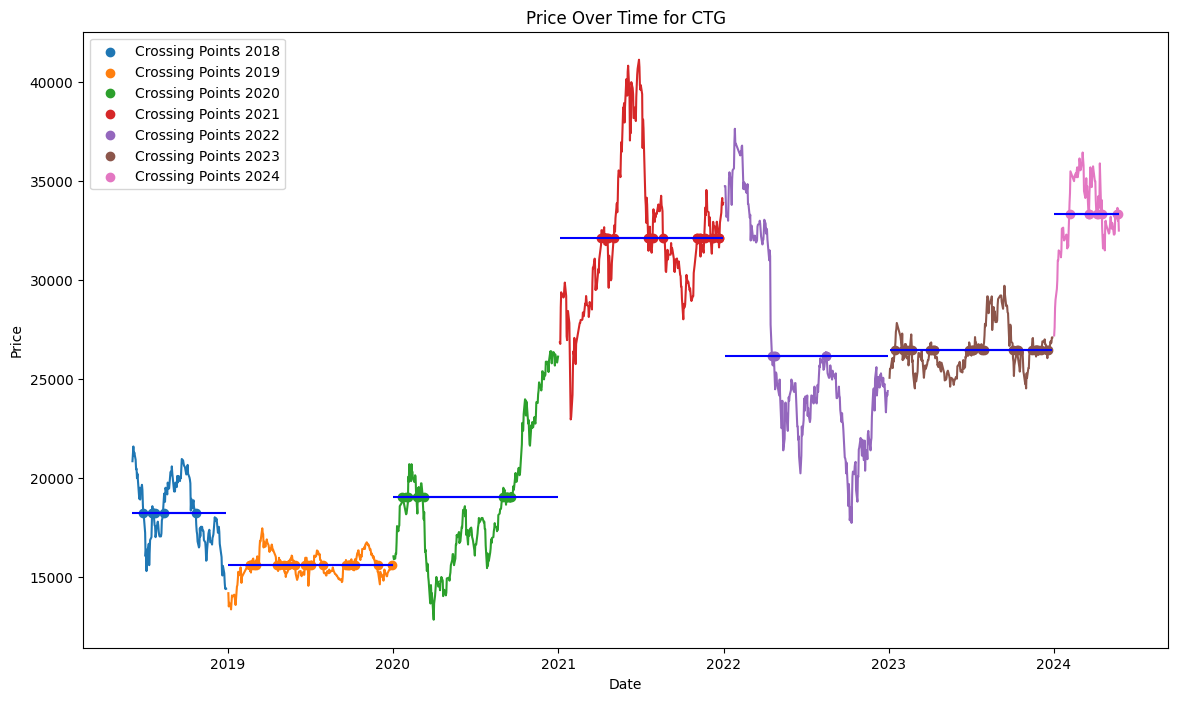

27877.70945945946 2018 TCB
23593.2 2019 TCB
21403.76984126984 2020 TCB
47061.6 2021 TCB
37759.03614457831 2022 TCB
30665.060240963856 2023 TCB
41757.89473684211 2024 TCB


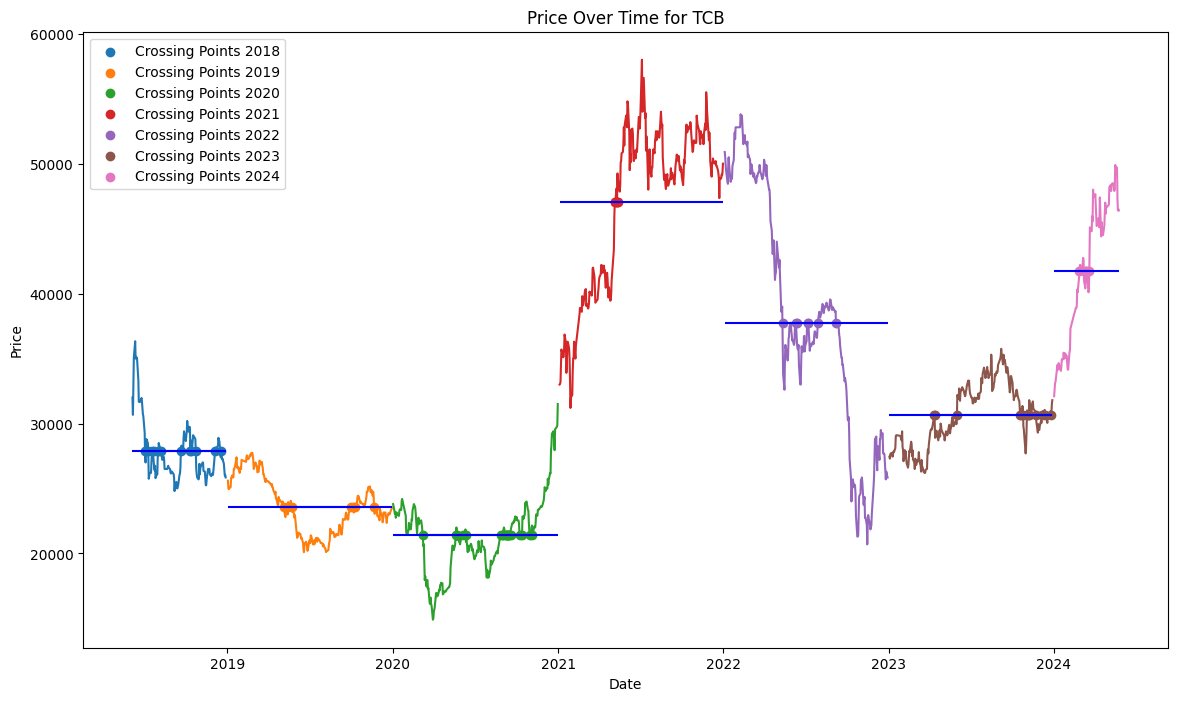

In [96]:
# Giả sử df là DataFrame của bạn với các cột 'Date', 'Stock symbol', và 'Price'
# Đảm bảo rằng cột 'Date' được chuyển đổi thành datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thêm cột 'Year' để lưu trữ năm của mỗi ngày
df['Year'] = df['Date'].dt.year

# Lấy danh sách các ngân hàng
banks = df['Stock symbol'].unique()
flag = 1
# Lặp qua từng ngân hàng và vẽ biểu đồ
for bank in banks:
    bank_data = df[df['Stock symbol'] == bank]
    
    # Thiết lập biểu đồ
    plt.figure(figsize=(14, 8))
    
    # Lấy danh sách các năm
    years = bank_data['Year'].unique()
    
    for year in years:
        yearly_data = bank_data[bank_data['Year'] == year]
        average_price = yearly_data['Price'].mean()
        # Vẽ đường giá trung bình
        plt.plot(yearly_data['Date'], yearly_data['Price'], )
        # Vẽ đoạn thẳng đại diện cho giá trị trung bình của năm
        start_date = yearly_data['Date'].min()
        end_date = yearly_data['Date'].max()
        if year == 2018:
            plt.hlines(y=average_price, xmin=start_date, xmax=end_date, colors='b',)
        else:
            plt.hlines(y=average_price, xmin=start_date, xmax=end_date, colors='b',label="")


    # Thêm các điểm cắt giữa giá cổ phiếu và đường trung bình
    for year in years:
        yearly_data = bank_data[bank_data['Year'] == year]
        average_price = yearly_data['Price'].mean()
        crossing_points = yearly_data[(yearly_data['Price'] > average_price) != (yearly_data['Price'] > average_price).shift(1)]
        y_value = [average_price] * len(crossing_points)

        # Bỏ điểm đầu tiên
        if not crossing_points.empty:
            crossing_points = crossing_points.iloc[1:]
        
        # Vẽ đoạn thẳng
        if not crossing_points.empty:
            if flag == 1:
                plt.plot(crossing_points['Date'], [average_price] * len(crossing_points), label='Mean line',color= 'blue')
                flag = 2
            plt.plot(crossing_points['Date'], [average_price] * len(crossing_points),color= 'blue')
        plt.scatter(crossing_points['Date'], [average_price] * len(crossing_points), label=f'Crossing Points {year}')

        
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Over Time for {bank}')
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()


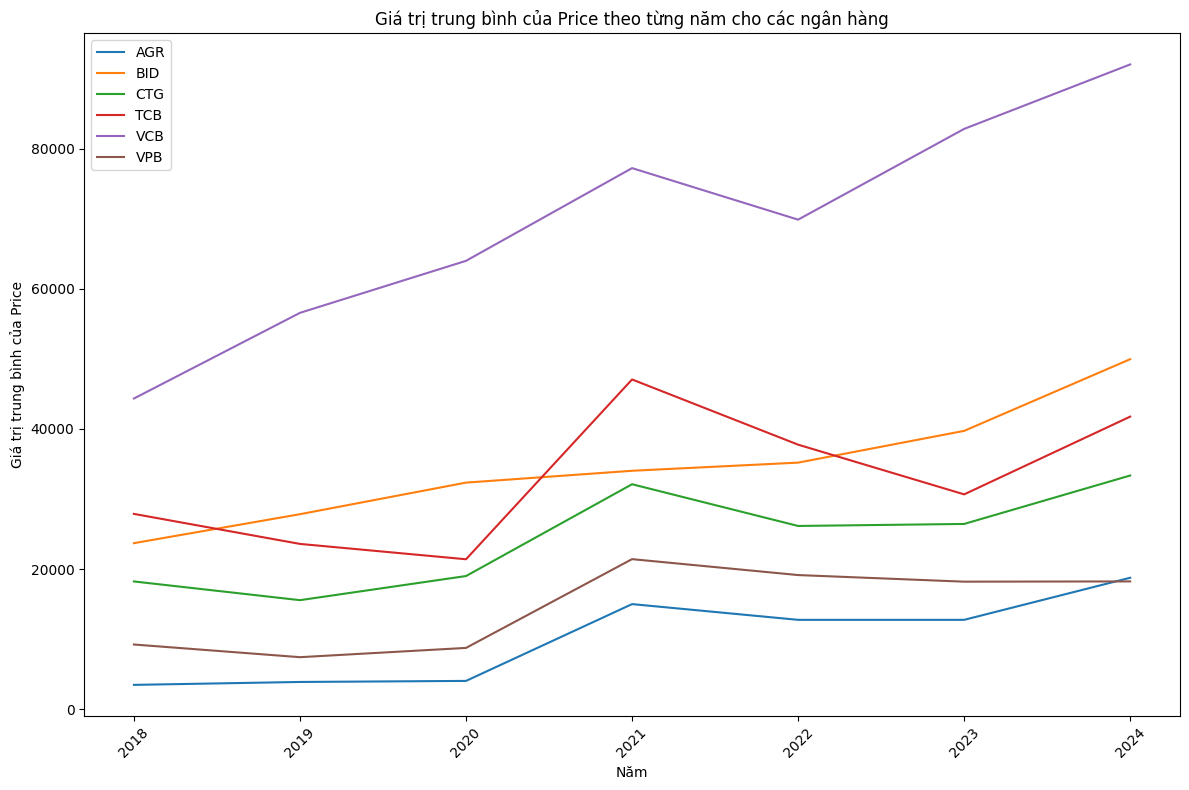

In [106]:
# Đọc dữ liệu từ DataFrame
df = pd.read_csv("Data/full_data_processed.csv")

# Tính giá trị trung bình của price cho từng ngân hàng theo từng năm
average_prices_by_year = df.groupby(['Stock symbol', df['Date'].str[:4]])['Price'].mean()

# Biến đổi dữ liệu thành một DataFrame để dễ quản lý
average_prices_by_year_df = average_prices_by_year.reset_index(name='Average Price')

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Lặp qua từng ngân hàng
for bank in average_prices_by_year_df['Stock symbol'].unique():
    bank_data = average_prices_by_year_df[average_prices_by_year_df['Stock symbol'] == bank]
    plt.plot(bank_data['Date'], bank_data['Average Price'], label=bank)

# Đặt tiêu đề và nhãn
plt.title('The average value of Price per year for each bank')
plt.xlabel('Year')
plt.ylabel('The average value of Price')
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Nhận xét:<br>
1. Nhận xét về mức tăng trưởng:<br><br>
VPB (Vietnam Prosperity Bank):<br>
VPB đã trải qua sự biến động từ mức giảm đáng kể vào năm 2019 đến mức tăng mạnh mẽ vào năm 2021, sau đó duy trì ở mức cao trong các năm sau đó.<br><br>
VCB (Vietcombank):<br>
VCB có mức tăng trưởng ấn tượng và liên tục từ năm 2018 đến 2024, đặc biệt là tăng mạnh từ năm 2023 đến 2024.<br><br>
BID (BIDV - Ngân hàng TMCP Đầu tư và Phát triển Việt Nam):<br>
BID cũng có mức tăng trưởng liên tục qua các năm, đặc biệt là tăng đột biến vào năm 2024.<br><br>
AGR (Agribank):<br>
AGR có sự tăng trưởng đáng kể từ năm 2023 đến 2024 sau một giai đoạn ổn định trong các năm trước đó.<br><br>
CTG (VietinBank):<br>
CTG cũng trải qua một giai đoạn tăng trưởng mạnh mẽ từ năm 2023 đến 2024 sau một giai đoạn biến động.<br><br>
TCB (Techcombank):<br>
TCB có mức tăng trưởng đáng kể trong giai đoạn 2021-2022, sau đó duy trì ổn định trong các năm sau đó.<br><br>
Tóm lại: <br>
Các cổ phiếu như VCB, BID và CTG đã có tốc độ tăng trưởng cao trong giai đoạn 2018-2024. Ví dụ, VCB đã có mức tăng trưởng từ khoảng 44,344.03 năm 2018 lên đến 92,021.05 năm 2024, chỉ trong vòng 6 năm. Tốc độ tăng trưởng của các cổ phiếu này có thể được coi là ấn tượng và cho thấy sự phát triển mạnh mẽ của các công ty trong thời gian này.<br>
Các cổ phiếu khác như VPB, AGR và TCB cũng đã có tốc độ tăng trưởng trung bình, không đạt được mức độ tăng trưởng cao như VCB, BID và CTG.<br><br><br>
2. Nhận xét về mối liên hệ giữa số lần đi qua giá trị trung bình và thời gian giữa các lần:<br>
* Khi giá cổ phiếu dao động xung quanh vị trí trung bình trong một khoảng thời gian, đặc biệt là trong một khoảng thời gian dài, điều này có thể cho thấy xu hướng ổn định của cổ phiếu đó trên thị trường trong giai đoạn đó. vd: BIDV<br>
* Giữa 2 điểm liên tục là 1 chu kỳ tăng giảm hoặc giảm tăng, tùy thời gian giữa các lần có thể đánh giá số lần thị trường biến động ít hay nhiều, thị trường đang có xu hướng (trend) hay không.

## 2/ Dữ liệu trung bình change(%) qua các năm của các ngân hàng

In [ ]:
# Đặt khoảng thời gian
start_year = 2018
end_year = 2024

# Tạo một DataFrame trống để lưu dữ liệu
data_list = []

# Lặp qua từng năm
for year in range(start_year, end_year + 1):
    # Lọc dữ liệu theo năm
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_df = df[mask]

    # Tính giá trị trung bình của Change % cho từng ngân hàng trong năm đó
    average_change = filtered_df.groupby('Stock symbol')['Change %'].mean()

    # Lưu dữ liệu vào danh sách
    for bank, avg_change in average_change.items():
        data_list.append({
            'Bank': bank,
            'Year': year,
            'Average Change': avg_change
        })

# Tạo DataFrame từ danh sách dữ liệu
df_to_save = pd.DataFrame(data_list)

# Lưu DataFrame vào file CSV
csv_filename = 'average_change_data.csv'
df_to_save.to_csv(csv_filename, index=False)
print(f"Dữ liệu đã được lưu vào file CSV: {csv_filename}")


Dữ liệu đã được lưu vào file CSV: average_change_data.csv


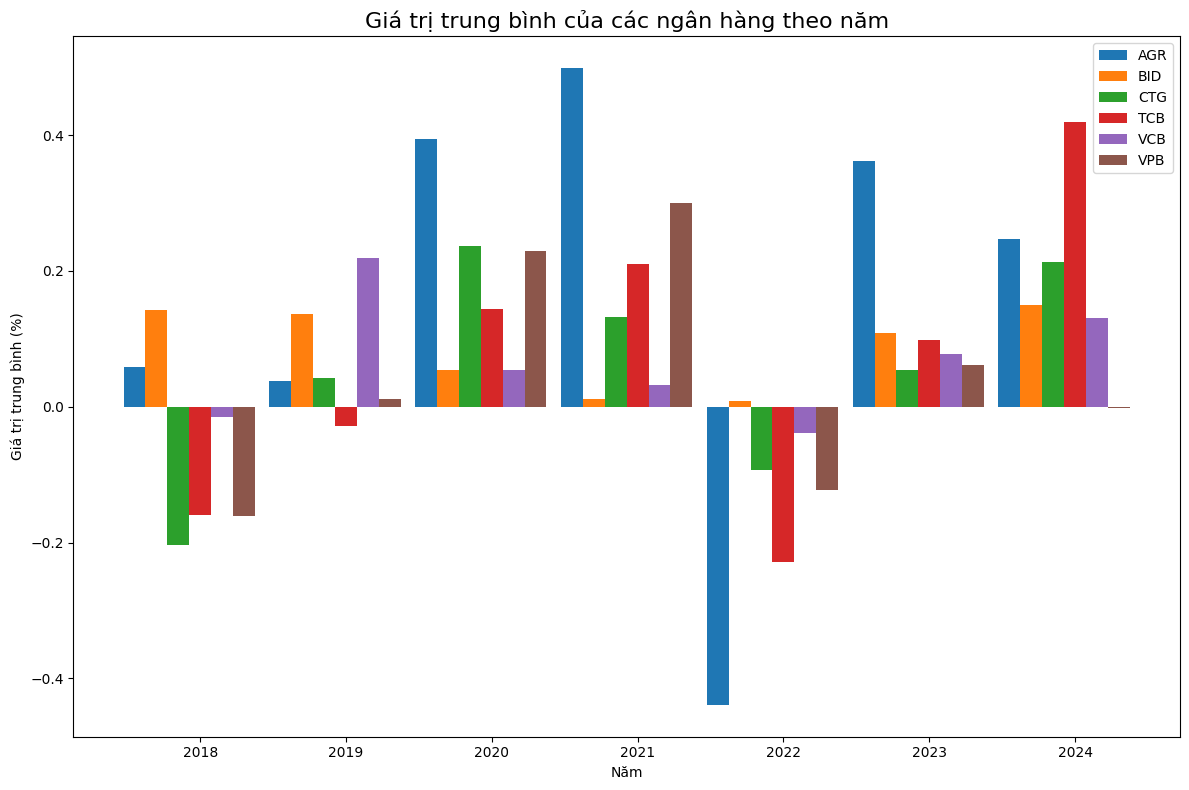

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('average_change_data.csv')

# Tạo một dictionary rỗng để lưu dữ liệu
average_prices = {}

# Lặp qua từng dòng trong DataFrame và thêm dữ liệu vào dictionary
for index, row in df.iterrows():
    bank = row['Bank']
    year = row['Year']
    average_change = row['Average Change']
    
    if bank not in average_prices:
        average_prices[bank] = {}
    
    average_prices[bank][year] = average_change


# Tạo các dữ liệu cần thiết cho biểu đồ cột
years = list(average_prices["AGR"].keys())
banks = list(average_prices.keys())
num_years = len(years)
bar_width = 0.15
index = np.arange(num_years)

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 8))

for i, bank in enumerate(banks):
    avg_prices = [average_prices[bank][year] for year in years]
    ax.bar(index + i * bar_width, avg_prices, bar_width, label=bank)

# Đặt tiêu đề và nhãn trục
ax.set_title('Average change values of banks by year', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Average change values (%)')

# Đặt các chỉ mục cho nhãn trục x và hiển thị nhãn trục x
ax.set_xticks(index + bar_width * (num_years - 1) / 2)
ax.set_xticklabels(years)

# Hiển thị chú thích
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


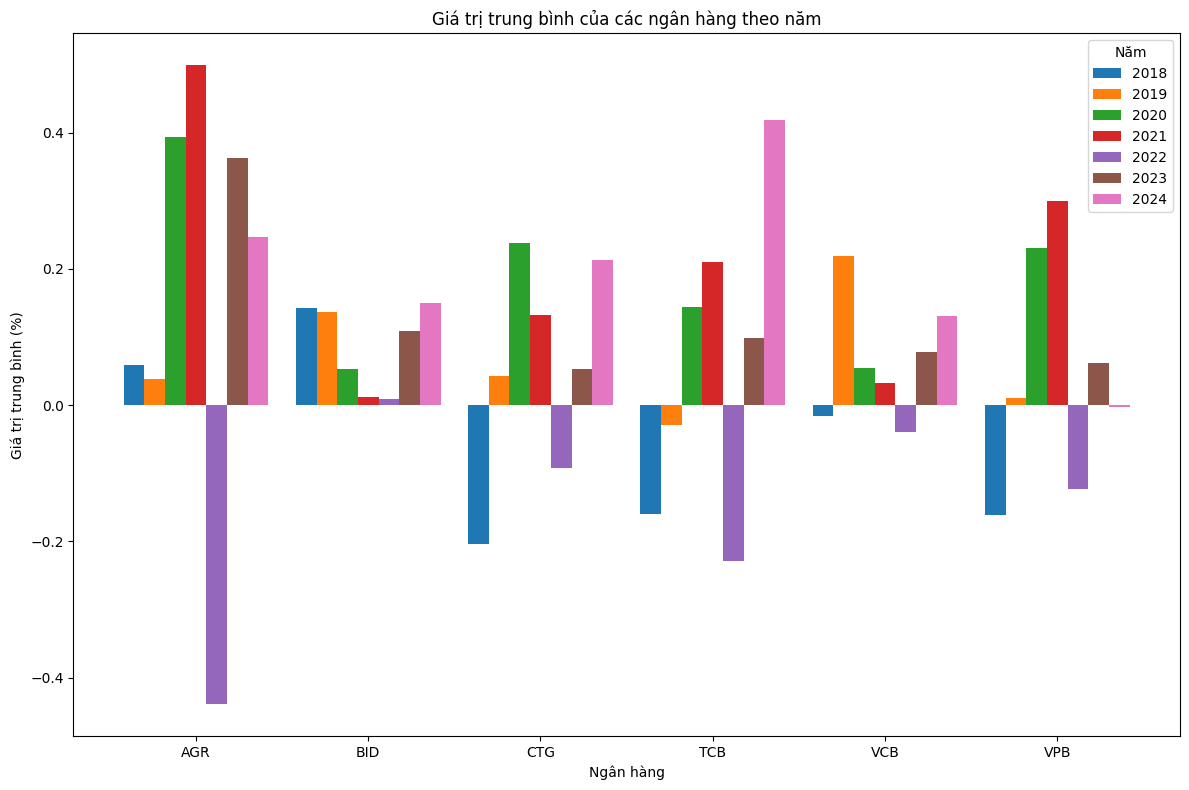

In [ ]:
# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 8))

# Tạo danh sách các ngân hàng và các năm
banks = df['Bank'].unique()
years = df['Year'].unique()
num_banks = len(banks)
bar_width = 0.12
index = np.arange(num_banks)

# Vẽ cột cho mỗi năm
for i, year in enumerate(years):
    avg_prices = df[df['Year'] == year]['Average Change'].values
    ax.bar(index + i * bar_width, avg_prices, bar_width, label=year)

# Đặt nhãn và chú thích
ax.set_xlabel('Bank')
ax.set_ylabel('The average value of Change (%)')
ax.set_title('Average change values of banks by bank')
ax.set_xticks(index + (len(years) - 1) * bar_width / 2)
ax.set_xticklabels(banks)
ax.legend(title='Năm')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### Nhận xét và phân tích sự thay đổi trung bình của các ngân hàng theo thời gian
Ngân hàng AGR:<br>

Có sự biến động lớn qua các năm, từ mức thấp nhất là -0.42% năm 2022 đến mức cao nhất là 0.50% năm 2021.<br>
Nhìn chung, giá trị trung bình (change %) của AGR có xu hướng tăng từ năm 2023 trở đi.<br><br>
Ngân hàng BID:<br>

Giá trị trung bình khá ổn định với mức tăng trưởng nhẹ qua các năm, dao động từ 0.01% đến 0.17%.<br>
Không có năm nào giá trị trung bình (change %) của BID dưới 0.<br><br>
Ngân hàng CTG:<br>

Có một số năm giá trị trung bình (change %) âm như năm 2018 (-0.22%) và 2022 (-0.05%).<br>
Tuy nhiên, từ năm 2020 trở đi, CTG có xu hướng tăng dần, đạt mức cao nhất là 0.26% vào năm 2024.<br><br>
Ngân hàng TCB:<br>

TCB có xu hướng giá trị trung bình (change %) tăng từ năm 2019 (-0.03%) đến 2024 (0.48%).<br>
Đặc biệt, năm 2022 giá trị trung bình (change %) giảm mạnh xuống -0.23% nhưng phục hồi nhanh chóng trong những năm tiếp theo.<br><br>
Ngân hàng VCB:<br>

Giá trị trung bình (change %) của VCB khá ổn định và luôn duy trì ở mức dương, dao động từ 0.02% đến 0.22%.<br>
Đặc biệt, năm 2019 có mức tăng cao nhất là 0.22%.<br><br>
Ngân hàng VPB:<br>
Giá trị trung bình change (%) có sự biến động lớn và không đồng đều qua các năm, với một số năm tăng và một số năm giảm. Dao động từ -0.16 (năm 2018) đến 0.3 (năm 2021). <br><br>
Tổng kết<br>
Xu hướng chung: Phần lớn các ngân hàng có xu hướng tăng giá trị trung bình (change %) qua các năm, đặc biệt là từ năm 2020 trở đi.<br>
Sự biến động: Một số ngân hàng như AGR và CTG có sự biến động mạnh qua các năm, trong khi BID và VCB có xu hướng ổn định hơn.<br>
Năm nổi bật: Năm 2024 là năm mà hầu hết các ngân hàng đều đạt mức giá trị trung bình (change %) cao nhất trong giai đoạn từ 2018 đến 2024.<br>


### Biểu diễn giá trị trung bình (Change %) Chi tiết 1 năm hoặc 1 ngân hàng nào đó

Dropdown(description='Năm:', options=(2018, 2019, 2020, 2021, 2022, 2023, 2024), value=2018)

Button(description='Vẽ theo Năm', style=ButtonStyle())

Dropdown(description='Ngân hàng:', options=('AGR', 'BID', 'CTG', 'TCB', 'VCB', 'VPB'), value='AGR')

Button(description='Vẽ theo Ngân hàng', style=ButtonStyle())

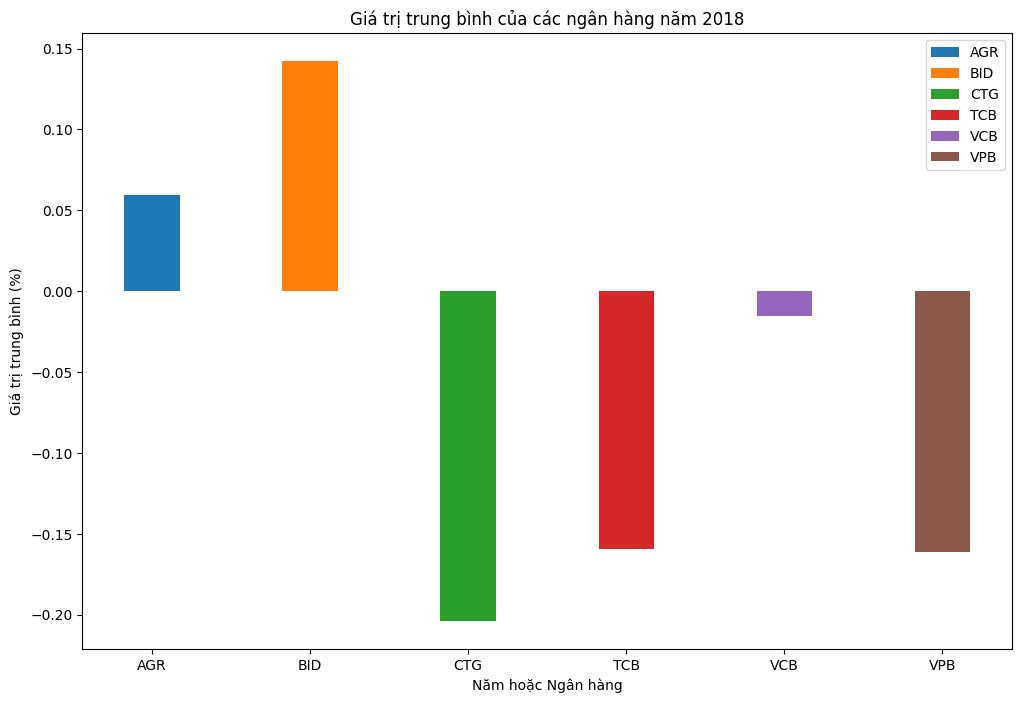

In [108]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('average_change_data.csv')

# Tạo hàm để vẽ biểu đồ
def plot_chart(year=None, bank=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    if year:
        df_year = df[df['Year'] == year]
        banks = df_year['Bank'].unique()
        index = np.arange(len(banks))
        bar_width = 0.35
        for i, bank in enumerate(banks):
            avg_prices = df_year[df_year['Bank'] == bank]['Average Change'].values
            ax.bar(index[i], avg_prices, bar_width, label=bank)
        ax.set_xticks(index)
        ax.set_xticklabels(banks)
        ax.set_title(f'Giá trị trung bình của các ngân hàng năm {year}')
    elif bank:
        df_bank = df[df['Bank'] == bank]
        years = df_bank['Year'].unique()
        index = np.arange(len(years))
        bar_width = 0.35
        for i, year in enumerate(years):
            avg_price = df_bank[df_bank['Year'] == year]['Average Change'].values[0]
            ax.bar(index[i], avg_price, bar_width, label=year)
        ax.set_xticks(index)
        ax.set_xticklabels(years)
        ax.set_title(f'Giá trị trung bình của ngân hàng {bank} qua các năm')
    ax.set_xlabel('Năm hoặc Ngân hàng')
    ax.set_ylabel('Giá trị trung bình (%)')
    ax.legend()
    plt.show()

# Tạo dropdown để chọn năm
year_dropdown = widgets.Dropdown(
    options=list(df['Year'].unique()),
    description='Năm:',
    disabled=False,
)

# Tạo dropdown để chọn ngân hàng
bank_dropdown = widgets.Dropdown(
    options=list(df['Bank'].unique()),
    description='Ngân hàng:',
    disabled=False,
)

# Tạo button để vẽ biểu đồ theo năm
year_button = widgets.Button(description="Vẽ theo Năm")

# Tạo button để vẽ biểu đồ theo ngân hàng
bank_button = widgets.Button(description="Vẽ theo Ngân hàng")

# Hàm xử lý sự kiện khi nhấn nút vẽ theo năm
def on_year_button_clicked(b):
    plot_chart(year=year_dropdown.value)

# Hàm xử lý sự kiện khi nhấn nút vẽ theo ngân hàng
def on_bank_button_clicked(b):
    plot_chart(bank=bank_dropdown.value)

# Gán hàm xử lý sự kiện cho các nút
year_button.on_click(on_year_button_clicked)
bank_button.on_click(on_bank_button_clicked)

# Hiển thị các widget và nút
display(year_dropdown, year_button)
display(bank_dropdown, bank_button)
